The Cobb-Douglas electricity projection model takes the form:

C = k0*KWH^(1/r) * PL^(a1/r) * PK^(a2/r) * PF^(a3/r) * e^error 

C = cost

k0 = an application-specific constant

KWH = kilowatt-hours

PL = price of labor

PK = price of capital

PF = price of fuel

A natural log transformation creates a linear model where:

ln(C) = beta0 + beta1[ln(KWH)] + beta2[ln(PL)] + beta3[ln(PK)] + beta4[ln(PF)] + error

From above, it follows that

beta0 = intercept

beta1 = 1/r

beta2 = a1/r

beta3 = a2/r

beta4 = a3/r

Therefore,

r = 1/beta1

a1 = beta2*r

a2 = beta3*r

a3 = beta4*r

In [1]:
#Our parameter estimates for the regressors are here:

beta0 = intercept = -3.526503
beta1 = 0.7203941
beta2 = 0.4363412
beta3 = 0.426517
beta4 = -0.219888

#To keep them organized, we'll keep them in a list.
betas = [round(b,4) for b in [beta0,beta1,beta2,beta3,beta4]]

for i,b in enumerate(betas):
    beta = "beta" + str(i) + ":"
    print(beta, b)

beta0: -3.5265
beta1: 0.7204
beta2: 0.4363
beta3: 0.4265
beta4: -0.2199


In [2]:
#r is equal to the reciprocal of beta1
r = round(1/beta1,4)
print(r)

1.3881


In [3]:
#betas 2, 3, and 4 multiplied by r will give us alphas 1, 2, and 3.
alphas = [round(x*r,4) for x in betas[2::]]

for i,a in enumerate(alphas):
    alpha = "alpha" + str(i+1) + ":"
    print(alpha, a)

alpha1: 0.6056
alpha2: 0.592
alpha3: -0.3052


In [4]:
#If costs are constant, r should equal the sum of the alpha terms
sum_alphas = sum(alphas)
print("r:",r)
print("sum(alphas):",sum_alphas)

r: 1.3881
sum(alphas): 0.8924


r is greater than the sum of the alphas. In terms of the model, this means that the exponential terms are less than one, indicating what should be diminishing returns at scale. This is good. 

In [5]:
from seaborn import pairplot as pp
import pandas as pd
army = pd.read_csv("/Users/Fr333y3d3a/Downloads/ArmyBodyDataFinalExam.csv")
army.head()

%BodyFat  AgeYrs  Height  Wt lbs  Inseam  Lat Fem Epi  Trocanter  \
0     27.56   34.66   68.31  194.26   30.75        19.45      35.94   
1     20.64   37.28   72.05  190.30   35.47        21.89      39.17   
2     16.89   38.97   67.95  156.86   30.94        19.09      34.80   
3     20.32   33.59   70.20  179.52   32.72        19.37      35.83   
4     23.23   42.03   65.71  166.32   30.91        19.45      33.74   

   Forearm Length  Chest   Neck  ...  Foot Width  Foot Length  Wrist Circ  \
0           11.46  41.42  18.43  ...        3.82        10.24        7.01   
1           12.01  40.51  16.42  ...        4.13        11.42        7.17   
2           11.06  39.17  16.34  ...        3.82        10.00        6.61   
3           11.54  38.03  17.13  ...        4.25        10.67        6.93   
4           10.94  40.63  15.71  ...        3.82         9.45        6.42   

   Hand Length  Hand Width  Thigh Circ  Nose Width  Biocular Dist  Ear Length  \
0         7.60        3.58       24.69        1.41           5.10        2.76   
1         8.39        3.82       24.21        1.24           4.91        2.83   
2         7.52        3.54       22.68        1.31           4.82        2.83   
3         8.03        3.54       24.25        1.44           5.14        2.52   
4         6.93        3.27       23.11        1.22           4.21        2.56   

   Outseam Omphalion  
0              40.51  
1              44.41  
2              40.31  
3              41.54  
4              38.50  

[5 rows x 21 columns]

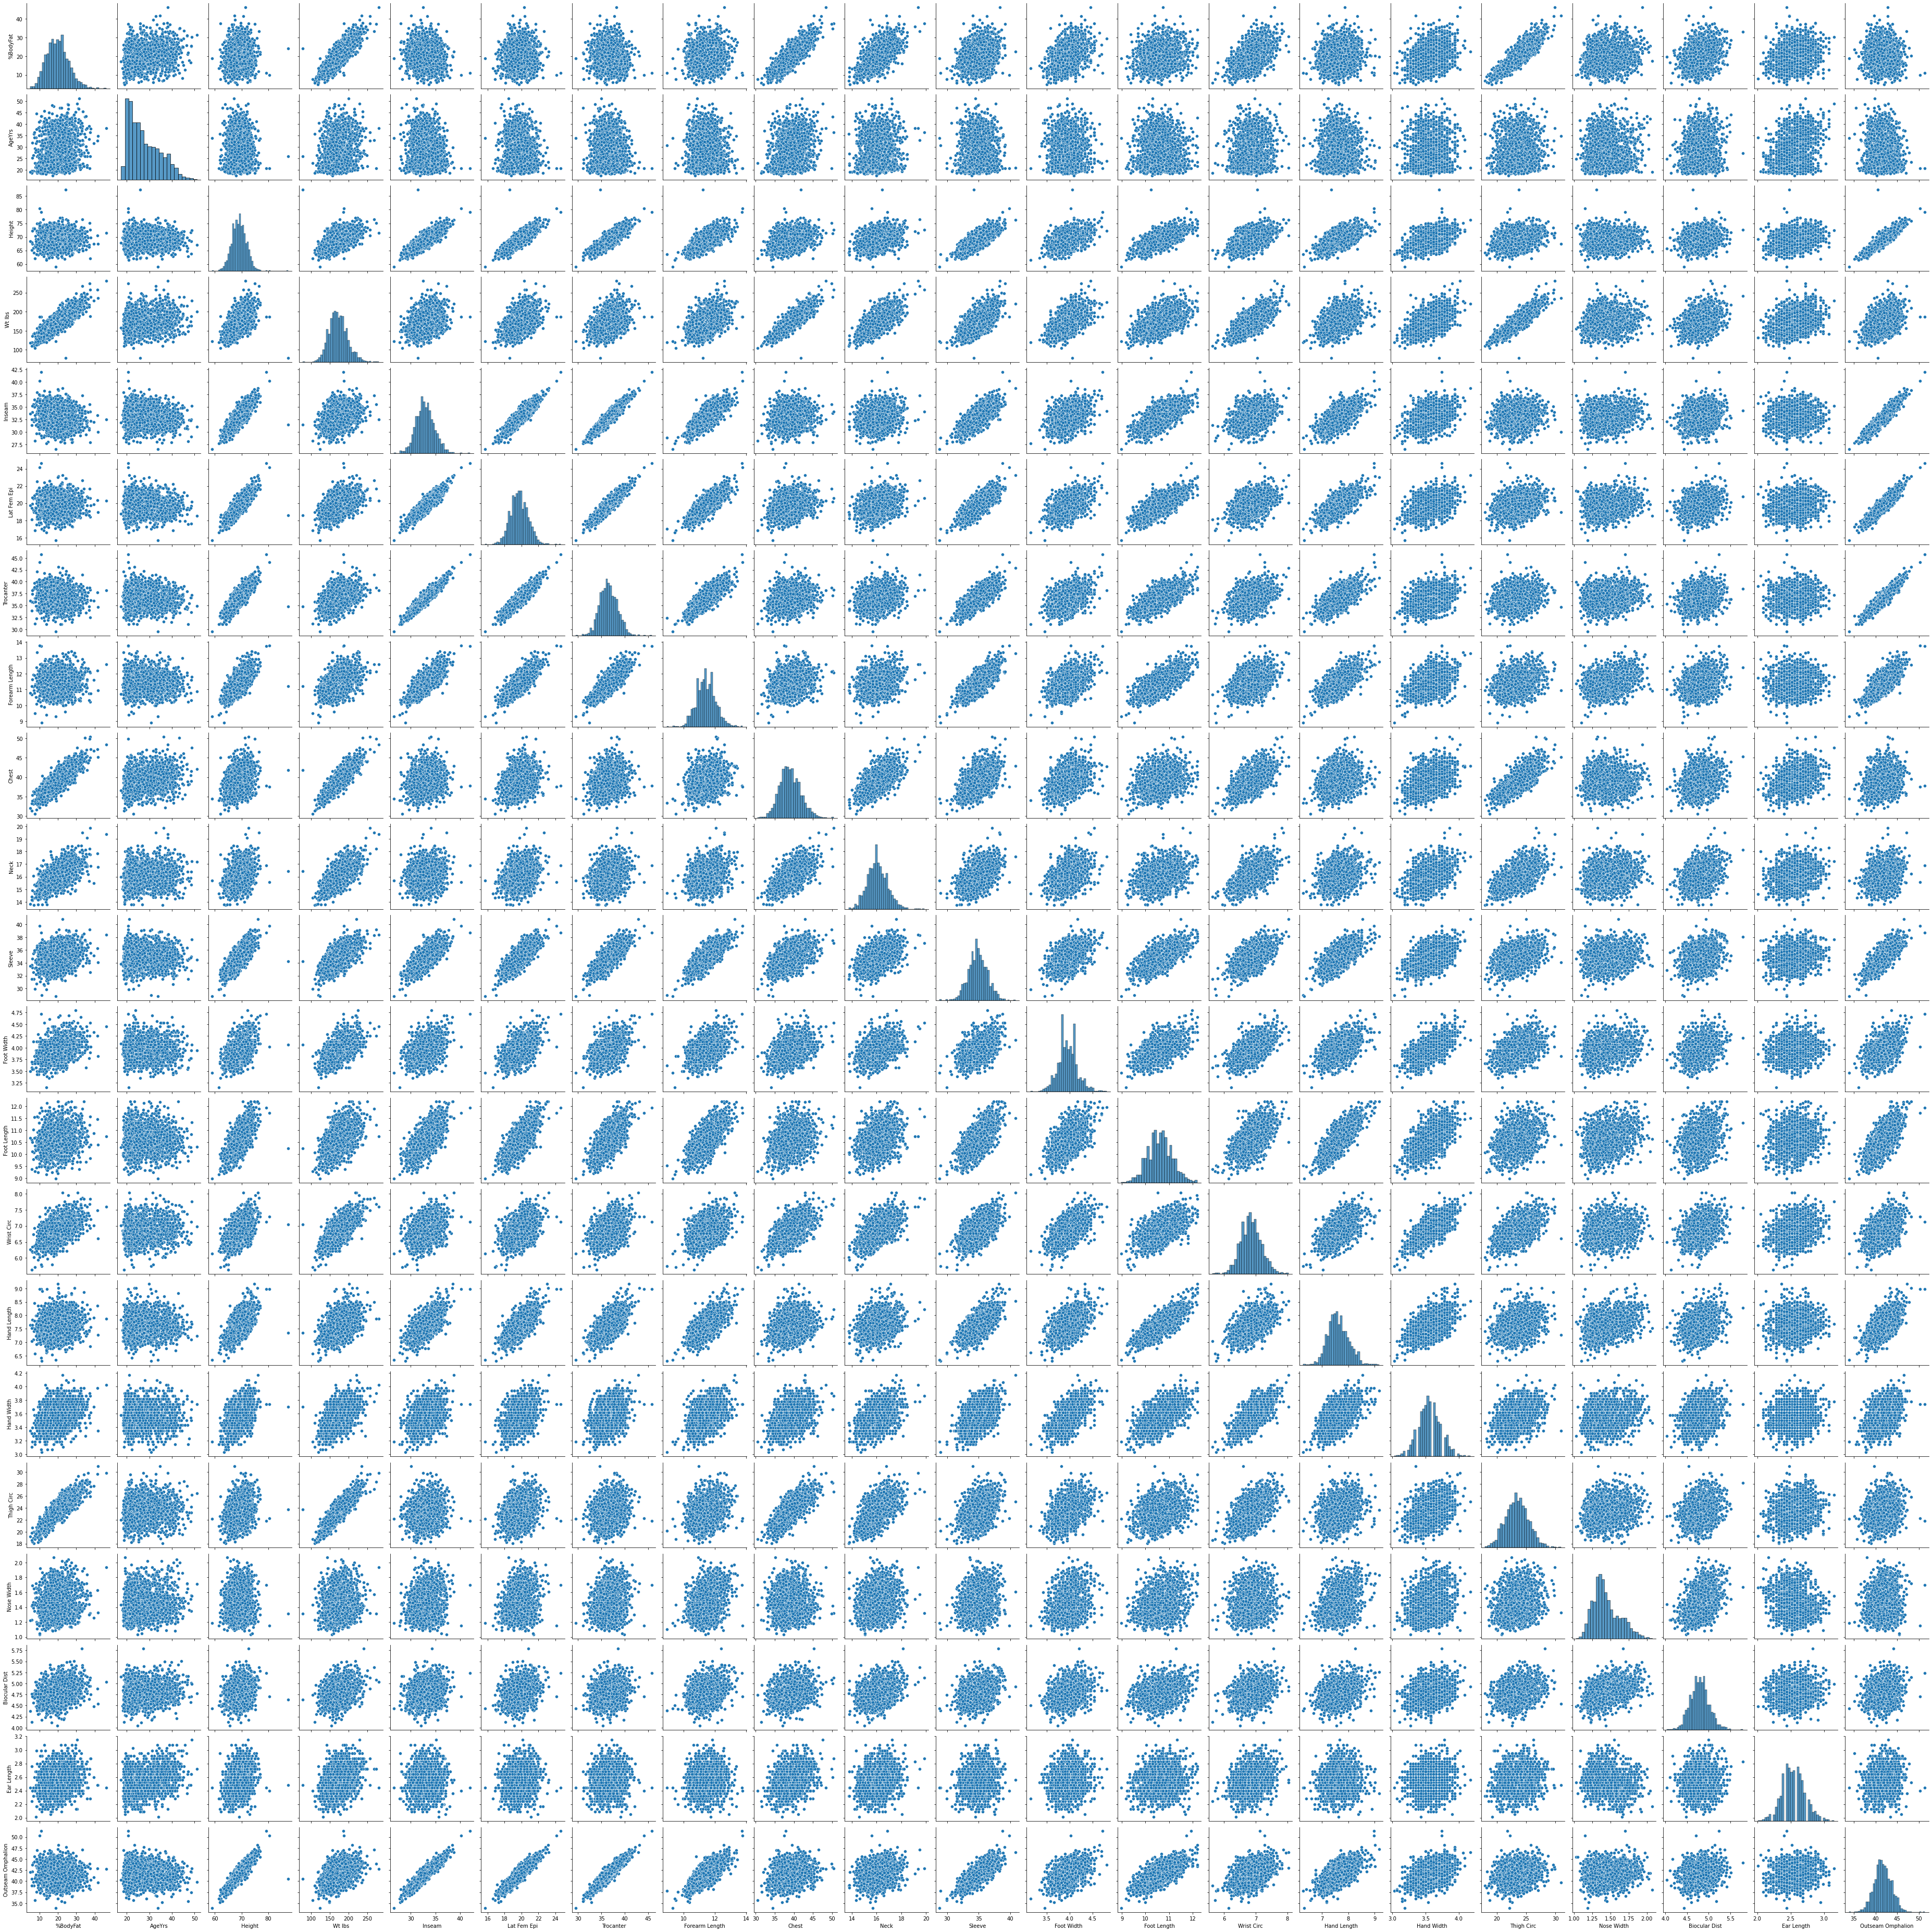

In [6]:
pair = pp(army)